<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/CNN_3conv_1flatten_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets('MNIST/data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
i_nodes = mnist.train.images.shape[1]
o_nodes = mnist.train.labels.shape[1]

#hyper_parameter
learning_rate = 0.001
epochs = 30
batch_size = 100

In [4]:
X = tf.placeholder(tf.float32, [None,i_nodes])
T = tf.placeholder(tf.float32, [None,o_nodes])

#28X28X1
A1 = tf.reshape(X, [-1,28,28,1])

In [5]:
#5X5X32
W2 = tf.Variable(tf.random_normal([5,5,1,32], stddev=0.01))
b2 = tf.Variable(tf.random_normal([32]))

#28X28X32
C2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding='SAME')

Z2 = tf.nn.relu(C2+b2)

#14X14X32
A2 = tf.nn.max_pool(Z2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [6]:
#5X5X64 Filter
W3 = tf.Variable(tf.random_normal([5,5,32,64], stddev=0.01))
b3 = tf.Variable(tf.random_normal([64]))

#14X14X64
C3 = tf.nn.conv2d(A2, W3, strides=[1,1,1,1], padding='SAME')

Z3 = tf.nn.relu(C3+b3)

#7X7X64
A3 = tf.nn.max_pool(Z3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [7]:
#5X5X128 Filter
W4 = tf.Variable(tf.random_normal([5,5,64,128], stddev=0.01))
b4 = tf.Variable(tf.random_normal([128]))

#7X7X128
C4 = tf.nn.conv2d(A3, W4, strides=[1,1,1,1], padding='SAME')

Z4 = tf.nn.relu(C4+b4)

#4X4X128
A4 = tf.nn.max_pool(Z4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [8]:
A4_flat = tf.reshape(A4, [-1, 4*4*128])

W5 = tf.Variable(tf.random_normal([4*4*128, 10], stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

Z5 = tf.matmul(A4_flat, W5) + b5

y = tf.nn.softmax(Z5)

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=T, logits=Z5))

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

In [10]:
predicted_val = tf.argmax(y,1)

accuracy_index = tf.cast(tf.equal(tf.argmax(y,1), tf.argmax(T,1)),dtype=tf.float32)

accuracy = tf.reduce_mean(accuracy_index)

In [11]:
index_label_prediction_list = []

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    start_time = datetime.now()

    for i in range(epochs):

        total_batch = int(mnist.train.num_examples / batch_size)

        for step in range(total_batch):

            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})

            if step % 100 == 0:

                print("epochs = ", i+1, ", stpe = ", step, ", loss value = ", loss_val)
    
    end_time = datetime.now()

    print("\nElapsed time = ", end_time - start_time)

    test_x_data = mnist.test.images
    test_t_data = mnist.test.labels

    accuracy_val, index_label, predicted_list = sess.run([accuracy, accuracy_index, predicted_val], feed_dict={X: test_x_data, T:test_t_data})

    print("\nAccuracy = ",accuracy_val)

    temp_list = []

    for i in range(len(index_label)):

        if index_label[i] == 0:

            temp_list.append(i)
            temp_list.append(np.argmax(test_t_data[i]))
            temp_list.append(predicted_list[i])

            index_label_prediction_list.append(temp_list)

            temp_list = []

epochs =  1 , stpe =  0 , loss value =  2.921029
epochs =  1 , stpe =  100 , loss value =  2.193867
epochs =  1 , stpe =  200 , loss value =  0.5950856
epochs =  1 , stpe =  300 , loss value =  0.25666398
epochs =  1 , stpe =  400 , loss value =  0.19872814
epochs =  1 , stpe =  500 , loss value =  0.1685784
epochs =  2 , stpe =  0 , loss value =  0.14089356
epochs =  2 , stpe =  100 , loss value =  0.08687982
epochs =  2 , stpe =  200 , loss value =  0.12333159
epochs =  2 , stpe =  300 , loss value =  0.08402706
epochs =  2 , stpe =  400 , loss value =  0.113067634
epochs =  2 , stpe =  500 , loss value =  0.104879454
epochs =  3 , stpe =  0 , loss value =  0.06510847
epochs =  3 , stpe =  100 , loss value =  0.09453373
epochs =  3 , stpe =  200 , loss value =  0.07414311
epochs =  3 , stpe =  300 , loss value =  0.07008763
epochs =  3 , stpe =  400 , loss value =  0.09669713
epochs =  3 , stpe =  500 , loss value =  0.048823148
epochs =  4 , stpe =  0 , loss value =  0.022244018
epo

In [12]:
print(index_label_prediction_list)

[[115, 4, 9], [247, 4, 6], [340, 5, 3], [381, 3, 7], [445, 6, 0], [449, 3, 5], [462, 6, 8], [495, 8, 0], [582, 8, 2], [619, 1, 8], [659, 2, 1], [720, 5, 8], [947, 8, 9], [1014, 6, 8], [1039, 7, 1], [1182, 6, 5], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1393, 5, 1], [1530, 8, 7], [1549, 4, 6], [1553, 9, 3], [1737, 5, 1], [2035, 5, 3], [2130, 4, 9], [2135, 6, 1], [2293, 9, 0], [2369, 5, 3], [2387, 9, 1], [2447, 4, 9], [2597, 5, 3], [2713, 0, 8], [2836, 4, 9], [2927, 3, 2], [2953, 3, 5], [2995, 6, 8], [3073, 1, 2], [3225, 7, 9], [3422, 6, 0], [3520, 6, 4], [3558, 5, 0], [3727, 8, 9], [3808, 7, 8], [3926, 9, 3], [4176, 2, 7], [4199, 7, 9], [4201, 1, 7], [4360, 5, 3], [4507, 1, 9], [4571, 6, 0], [4761, 9, 8], [5457, 1, 8], [5654, 7, 2], [5676, 4, 7], [5937, 5, 3], [6571, 9, 7], [6576, 7, 1], [6597, 0, 7], [6783, 1, 6], [7565, 7, 4], [8061, 4, 9], [8071, 4, 9], [8246, 3, 9], [8408, 8, 5], [8520, 4, 9], [9015, 7, 2], [9530, 9, 8], [9634, 0, 2], [9642, 9, 7], [9664, 2, 7], [9692, 9, 7], [972

In [13]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
now = datetime.now()

print(now)
print(now.month)

2020-12-22 13:50:30.478446
12


10 image is saved now
20 image is saved now
30 image is saved now
40 image is saved now
50 image is saved now
60 image is saved now
70 image is saved now
Elapsed save time =>  0:00:19.133995
Total  74  data is saved


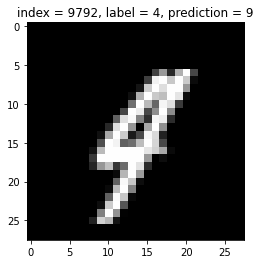

In [15]:
save_count = 0

example_name = 'CNN_Example_5_1_'

#현재 디렉토리 저장
cur_dir = os.getcwd()

#image 저장 할 디렉토리 생성. 현재 시간으로 생성
now = datetime.now()

save_dir_name  = example_name + str(now.year) + '-' + str(now.month) + '-' + str(now.day)

colab_default_dir = './drive/MyDrive/AI_INOVATION_SQUARE/prac'

os.chdir(colab_default_dir)
os.mkdir(save_dir_name)

os.chdir(save_dir_name)

start_time = datetime.now()

for list_data in index_label_prediction_list:

    index_int = list_data[0]
    label_int = list_data[1]
    prediction_int = list_data[2]

    #인덱스 문자열
    index_str = str(index_int)

    #정답 문자열
    label_str = str(label_int)

    #예측값 문자열
    prediction_str = str(prediction_int)

    #인덱스, 정답, 예측값(오답)을 나타내는 문자열
    index_label_prediction_str = 'index = ' + index_str + ', label = ' + label_str + ', prediction = ' + prediction_str

    #저장 파일 이름 생성, str(index_int).png
    save_image_name = str(index_int) + '.png'
    plt.title(index_label_prediction_str)

    img = test_x_data[index_int].reshape(28,28)
    plt.imshow(img, cmap='gray')

    plt.savefig(save_image_name) #파일 저장

    save_count += 1

    if save_count % 10 == 0 :

        print(save_count, "image is saved now")

end_time = datetime.now()

print("Elapsed save time => ", end_time - start_time)
print("Total ", save_count, " data is saved")

#원래의 dir로 복귀
os.chdir(cur_dir)